# Deep Learning Assignment - 01 , Problem - 01, Group - 029
# Vision Dataset - Animal Image Classification 

https://www.kaggle.com/rwt1998/animal-classification

https://www.kaggle.com/bygbrains/dog-cat-pandas-image-classifier


## Library Imports

In [20]:
import os
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

## Validate GPU Availability

In [3]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
else:
    print("No GPU Available, switching to CPU Version")

1 Physical GPUs, 1 Logical GPUs


## Load the dataset and validate the data load

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

dataset = train_datagen.flow_from_directory("/home/suvo/Documents/LargeDatasets/CNNDatasets/Cats-Dogs-Pandas/animals", target_size=(32, 32), batch_size=32, class_mode='binary')

Found 3000 images belonging to 3 classes.


In [8]:
listdir("/home/suvo/Documents/LargeDatasets/CNNDatasets/Cats-Dogs-Pandas/animals")

['cats', 'dogs', 'panda']

In [49]:
folder = "/home/suvo/Documents/LargeDatasets/CNNDatasets/Cats-Dogs-Pandas/animals"
# folder1 = "/home/suvo/Documents/LargeDatasets/CNNDatasets/Cats-Dogs-Pandas/animals"

imageList=[]
classList=[]

for file1 in listdir(folder):
    file2 = folder + "/" + file1
    for file3 in listdir(file2):
        file4 = file2 + "/" + file3
        image = tf.keras.preprocessing.image.load_img(file4, target_size=(300, 300))
        image = tf.keras.preprocessing.image.img_to_array(image)
        imageList.append(image)
        classList.append(file1)

# Check whether all the images has been parsed
print(f"Length of the image list - {len(imageList)}")
print(f"Length of the class list - {len(classList)}")

Length of the image list - 3000
Length of the class list - 3000


In [50]:
# We will convert this list into numpy array
imageArray = np.asarray(imageList)
classArray = np.asarray(classList)

print(f"Shape of the image numpy array - {imageArray.shape}")
print(f"Shape of the class numpy array - {classArray.shape}")

Shape of the image numpy array - (3000, 300, 300, 3)
Shape of the class numpy array - (3000,)


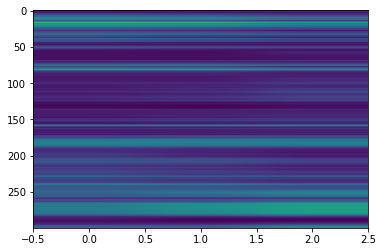